# Implement Your Machine Learning Project Plan

In this lab you will implement the machine learning project plan you created in the assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Create features and a label, and prepare your data for your model.
3. Fit your model to the training data and evaluate your model. 
4. Show how you've improved upon your baseline model.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import the additional packages that you will need for this task (only import packages that you have used in this course).

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV

## Part 1: Load the Data Set


You have chosen to work with one of three data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultDataFull.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is location in file `WHR2018Chapter2OnlineData.csv`

<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
filename = os.path.join(os.getcwd(), "data","airbnbListingsData.csv")
df = pd.read_csv(filename, header=0)

## Part 2: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [4]:
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [5]:
df.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

In [6]:
df = df.select_dtypes(exclude=['object','bool']).dropna()

In [7]:
y=df["host_acceptance_rate"]
X=df.drop(columns="host_acceptance_rate",axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [11]:
from sklearn.model_selection import RandomizedSearchCV

In [20]:
max_depth = [16,32,64]
n_estimators = [50,100]
random_grid = {'max_depth': max_depth,'n_estimators': n_estimators}
pprint(random_grid)

{'max_depth': [16, 32, 64], 'n_estimators': [50, 100]}


In [21]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, verbose=2)

In [22]:
rf_random.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] n_estimators=50, max_depth=16 ...................................
[CV] .................... n_estimators=50, max_depth=16, total=   3.2s
[CV] n_estimators=50, max_depth=16 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV] .................... n_estimators=50, max_depth=16, total=   3.4s
[CV] n_estimators=50, max_depth=16 ...................................
[CV] .................... n_estimators=50, max_depth=16, total=   3.5s
[CV] n_estimators=100, max_depth=16 ..................................
[CV] ................... n_estimators=100, max_depth=16, total=   6.6s
[CV] n_estimators=100, max_depth=16 ..................................
[CV] ................... n_estimators=100, max_depth=16, total=   6.8s
[CV] n_estimators=100, max_depth=16 ..................................
[CV] ................... n_estimators=100, max_depth=16, total=   6.8s
[CV] n_estimators=50, max_depth=32 ...................................
[CV] .................... n_estimators=50, max_depth=32, total=   4.4s
[CV] n_estimators=50, max_depth=32 ...................................
[CV] .................... n_estimators=50, max_depth=32, total=   4.7s
[CV] n_estimators=50, max_depth=32 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [23]:
rf_random.best_params_

{'max_depth': 16, 'n_estimators': 100}

In [24]:
print('Begin RF Implementation...')
rf_model = RandomForestRegressor(max_depth=16, n_estimators=100)
rf_model.fit(X_train, y_train)
print('End')

Begin RF Implementation...
End


In [25]:
y_rf_pred = rf_random.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)             
print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))   

[RF] Root Mean Squared Error: 0.18805053577805753
[RF] R2: 0.5241609249700107


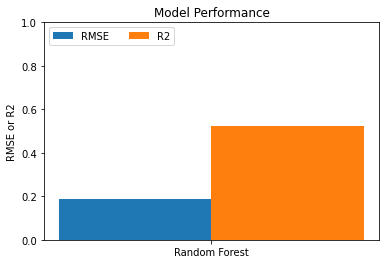

In [32]:
RMSE_Results = [rf_rmse]
R2_Results = [rf_r2]

rg= np.arange(1)
width = 0.2
plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.bar(rg+width, R2_Results, width, label='R2')
plt.xticks(rg + width/2, labels)
plt.ylabel("RMSE or R2")
plt.ylim([0,1])

plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

The random forest model did relatively well to minimize the RMSE and maximize the R^2 value. Further exploration into hyperparameter tuning may further increase the R^2 value, and using other methods to deal with NaN data would also likely improve the model performance.